In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# UNet
# Average L1 Loss: 0.0244
# Average VGG Loss: 1.3888
# Average PSNR: 22.5388 dB
# Average SSIM: 0.9550

# DeepFill
# Average L1 Loss: 0.0169
# Average VGG Loss: 1.3596
# Average PSNR: 23.7579 dB
# Average SSIM: 0.9594 

# Average L1 Loss (coarse): 0.0346
# Average VGG Loss (coarse): 3.8935
# Average PSNR (coarse): 22.2114 dB
# Average SSIM (coarse): 0.9076

unet = {
    "l1": 0.0244,
    "vgg": 1.3888,
    "psnr": 22.5388,
    "ssim": 0.9550
}

deepfill = {
    "l1": 0.0169,
    "vgg": 1.3596,
    "psnr": 23.7579,
    "ssim": 0.9594
}

deepfill_coarse = {
    "l1": 0.0346,
    "vgg": 3.8935,
    "psnr": 22.2114,
    "ssim": 0.9076
}

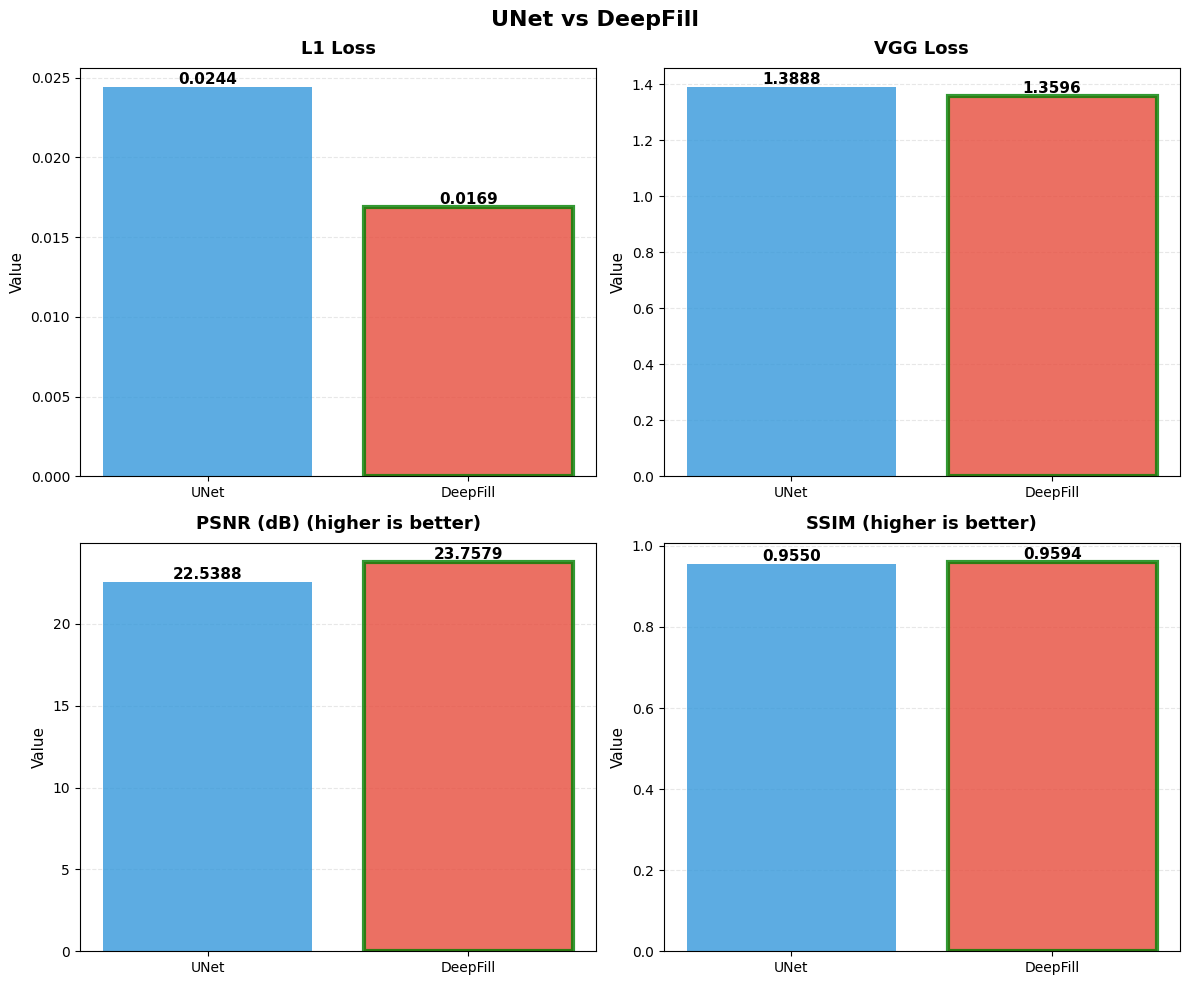

In [25]:
import numpy as np

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('UNet vs DeepFill', fontsize=16, fontweight='bold')

# Metrics to compare
metrics = ['l1', 'vgg', 'psnr', 'ssim']
titles = ['L1 Loss', 'VGG Loss', 'PSNR (dB) (higher is better)', 'SSIM (higher is better)']
colors = ['#3498db', '#e74c3c']

# Flatten axes for easier iteration
axes = axes.flatten()

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx]
    
    # Data for this metric
    models = ['UNet', 'DeepFill']
    values = [unet[metric], deepfill[metric]]
    
    # Create bar chart
    bars = ax.bar(models, values, color=colors, alpha=0.8, linewidth=1.5)
    
    # Add value labels on top of bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.4f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Styling
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.set_ylabel('Value', fontsize=11)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    
    # For metrics where lower is better (l1, vgg), highlight the better one
    # For metrics where higher is better (psnr, ssim), highlight the better one
    if metric in ['l1', 'vgg']:
        best_idx = np.argmin(values)
    else:
        best_idx = np.argmax(values)
    bars[best_idx].set_edgecolor('green')
    bars[best_idx].set_linewidth(3)

plt.tight_layout()
plt.show()

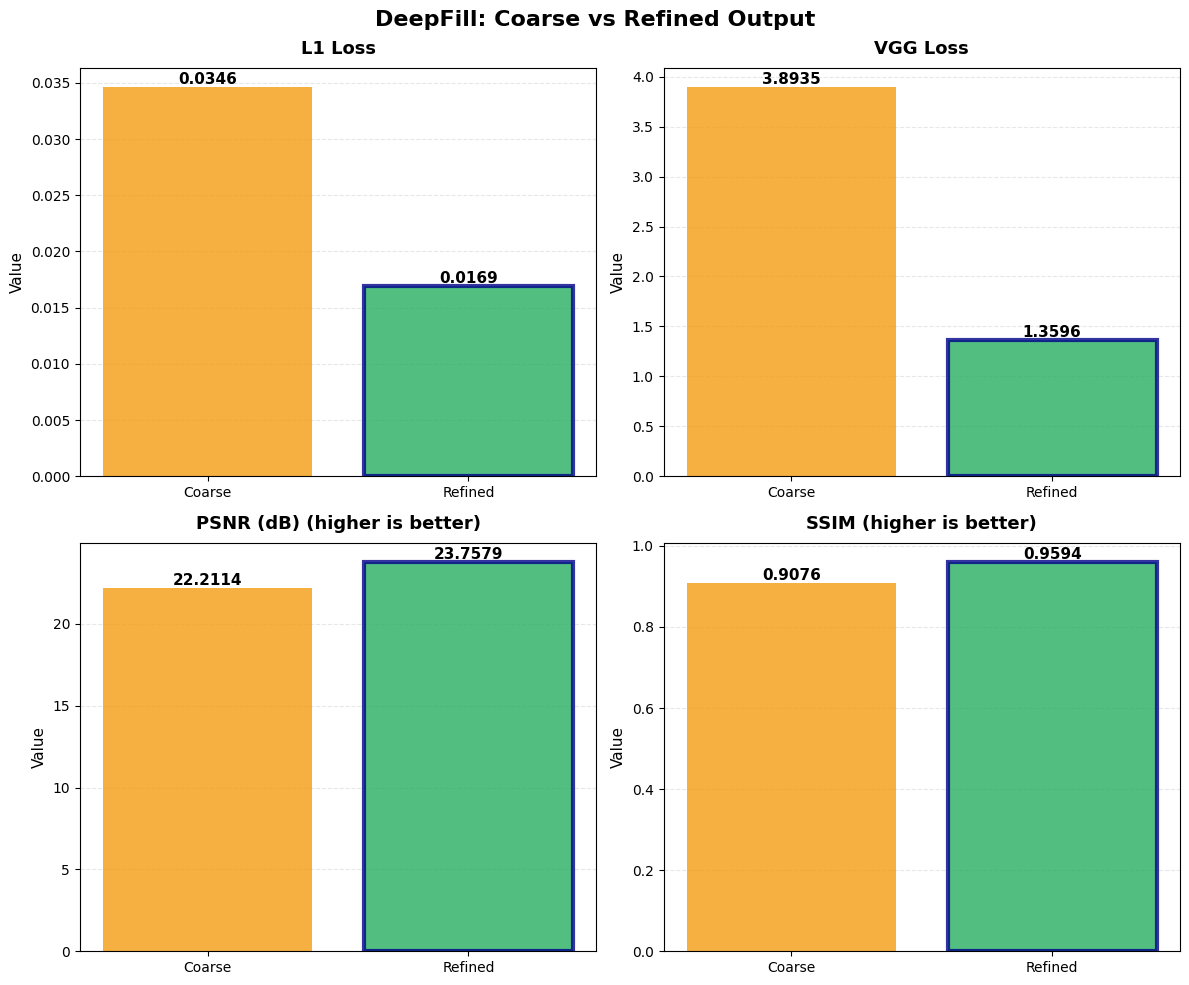

In [26]:
# Create figure with 2x2 subplots for DeepFill Coarse vs Refined comparison
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 10))
fig2.suptitle('DeepFill: Coarse vs Refined Output', fontsize=16, fontweight='bold')

# Metrics to compare
metrics = ['l1', 'vgg', 'psnr', 'ssim']
titles = ['L1 Loss', 'VGG Loss', 'PSNR (dB) (higher is better)', 'SSIM (higher is better)']
colors = ['#f39c12', '#27ae60']  # Orange for Coarse, Green for Refined

# Flatten axes for easier iteration
axes2 = axes2.flatten()

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes2[idx]
    
    # Data for this metric
    models = ['Coarse', 'Refined']
    values = [deepfill_coarse[metric], deepfill[metric]]
    
    # Create bar chart
    bars = ax.bar(models, values, color=colors, alpha=0.8, linewidth=1.5)
    
    # Add value labels on top of bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.4f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Styling
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.set_ylabel('Value', fontsize=11)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    
    # For metrics where lower is better (l1, vgg), highlight the better one
    # For metrics where higher is better (psnr, ssim), highlight the better one
    if metric in ['l1', 'vgg']:
        best_idx = np.argmin(values)
    else:
        best_idx = np.argmax(values)
    bars[best_idx].set_edgecolor('darkblue')
    bars[best_idx].set_linewidth(3)

plt.tight_layout()
plt.show()